<a href="https://colab.research.google.com/github/GeorgeSantos1/Projetos/blob/main/CNN_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carregamento de Pacotes e Imagens

In [80]:
# Carregando Módulos
import os
import cv2 #OpenCV
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Dense, AveragePooling2D, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
# Carregando diretório
xray_dir = "/content/drive/MyDrive/DM/Departamento médico/Dataset"
os.listdir(xray_dir)

['0', '1', '2', '3']

In [75]:
# Carregando Imagens
image_generator = ImageDataGenerator(rescale=1./255)
train_generator = image_generator.flow_from_directory(batch_size = 40, directory=xray_dir,
                                                      shuffle = True, target_size=(256, 256),
                                                      class_mode = 'categorical', subset='training')

Found 532 images belonging to 4 classes.


In [76]:
# Visualizando Categoria
train_images, train_labels = next(train_generator)
train_images.shape

(40, 256, 256, 3)

In [77]:
train_labels

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]],

In [78]:
# Covid19 - 1 0 0 0
# Normal  - 0 1 0 0
# Viral   - 0 0 1 0
# Bacterial - 0 0 0 1
labels_names = {0: 'Covid-19', 1: 'Normal', 2: 'Pneunomia viral', 3: 'Pneunomia bacterial'}

## Visualização dos dados

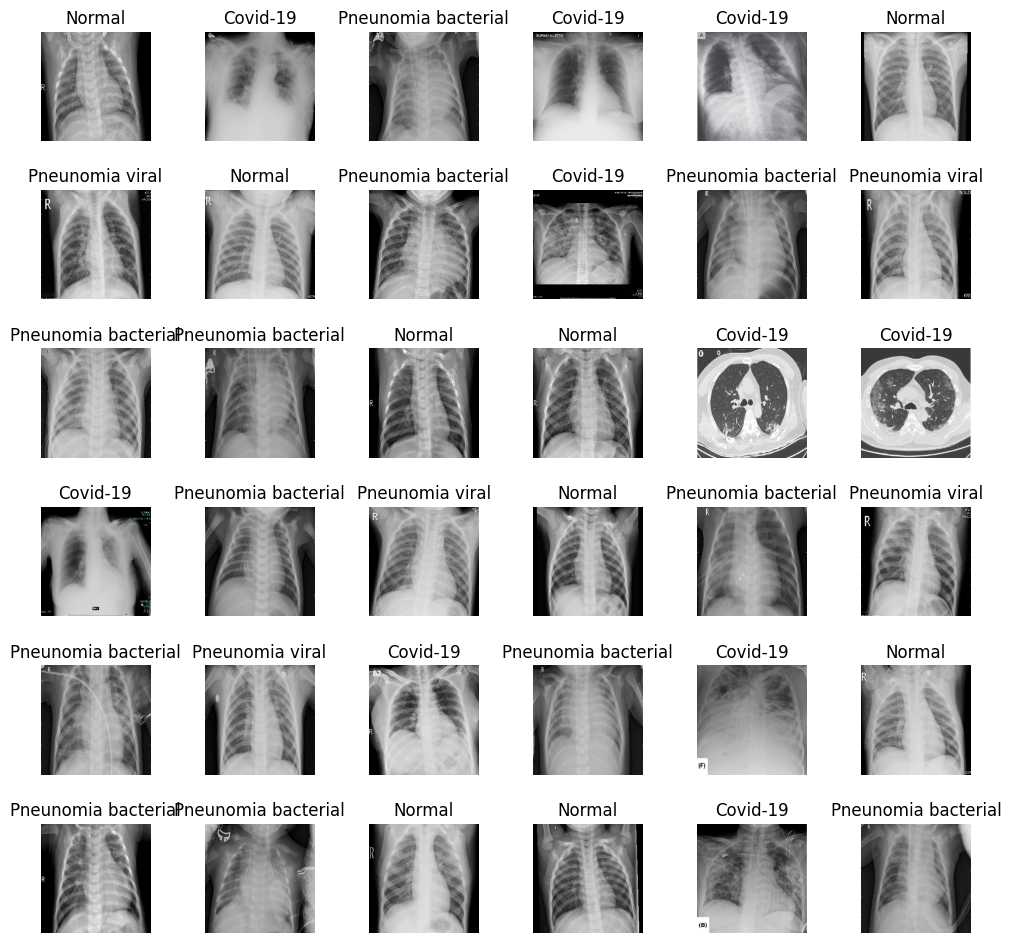

In [79]:
fig, axes = plt.subplots(6, 6, figsize=(12, 12))
axes = axes.ravel()
for i in np.arange(0, 36):
  axes[i].imshow(train_images[i])
  axes[i].set_title(labels_names[np.argmax(train_labels[i])])
  axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

## Carregamento da rede neural com pesos pré-treinados

In [97]:
base_model = ResNet50(weights='imagenet', include_top=False,
                      input_tensor = Input(shape=(256,256,3)))

In [98]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [81]:
len(base_model.layers)

175

In [82]:
for layers in base_model.layers[:-10]:
  layers.trainable = False

## Construção e treinamento do modelo de deep learning

In [99]:
# Definindo a estrutura da Rede Neural
head_model = base_model.output # Cabeçalho do modelo
head_model = AveragePooling2D()(head_model)
head_model = Flatten()(head_model)
head_model = Dense(128, activation = 'relu')(head_model)
head_model = Dropout(0.2)(head_model) # Desativa % de forma aleatória de neurônios da camada
head_model = Dense(128, activation = 'relu')(head_model)
head_model = Dropout(0.2)(head_model)
head_model = Dense(4, activation = 'softmax')(head_model)

In [100]:
model = Model(inputs = base_model.input, outputs = head_model)


opt = optimizers.legacy.RMSprop(learning_rate=1e-4, decay=1e-6)

model.compile(loss = 'categorical_crossentropy', optimizer=opt,
              metrics = ['accuracy'])

checkpointer = ModelCheckpoint(filepath='weights.hdf5') # Salva a rede neural

In [101]:
train_generator = image_generator.flow_from_directory(batch_size = 8, directory=xray_dir,
                                                      shuffle = True, target_size=(256, 256),
                                                      class_mode = 'categorical', subset='training')

Found 532 images belonging to 4 classes.


In [102]:
history = model.fit(train_generator, epochs = 25,
                              callbacks=[checkpointer])

Epoch 1/25
67/67 [==============================] - ETA: 0s - loss: 0.9381 - accuracy: 0.6805

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - 367s 5s/step - loss: 0.9381 - accuracy: 0.6805
Epoch 2/25
67/67 [==============================] - 342s 5s/step - loss: 0.3919 - accuracy: 0.8910
Epoch 3/25
67/67 [==============================] - 325s 5s/step - loss: 0.2717 - accuracy: 0.9286
Epoch 4/25
67/67 [==============================] - 324s 5s/step - loss: 0.1832 - accuracy: 0.9511
Epoch 5/25
67/67 [==============================] - 321s 5s/step - loss: 0.1467 - accuracy: 0.9624
Epoch 6/25
67/67 [==============================] - 327s 5s/step - loss: 0.0597 - accuracy: 0.9868
Epoch 7/25
67/67 [==============================] - 325s 5s/step - loss: 0.1363 - accuracy: 0.9756
Epoch 8/25
67/67 [==============================] - 325s 5s/step - loss: 0.0625 - accuracy: 0.9812
Epoch 9/25
67/67 [==============================] - 326s 5s/step - loss: 0.0249 - accuracy: 0.9925
Epoch 10/25
67/67 [==============================] - 328s 5s/step - loss: 0.1303 - accuracy: 0.9774
Epoch 11/25
67/67 [=

## Avaliação da rede neural

In [103]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

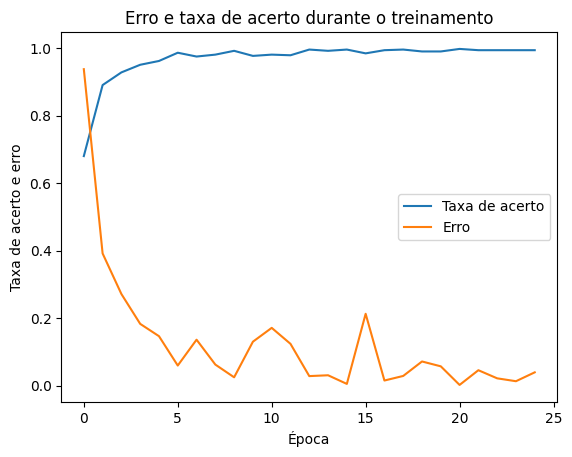

In [104]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Erro e taxa de acerto durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Taxa de acerto e erro')
plt.legend(['Taxa de acerto', 'Erro']);

In [105]:
test_dir = "/content/drive/MyDrive/DM/Departamento médico/Test"
os.listdir(test_dir)

['0', '1', '2', '3']

In [110]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_directory(batch_size = 40, directory = test_dir,
                                              shuffle = True, target_size = (256, 256),
                                              class_mode = 'categorical')

Found 40 images belonging to 4 classes.


In [111]:
evaluate = model.evaluate(test_generator)
evaluate

1/1 [==============================] - 7s 7s/step - loss: 3.9328 - accuracy: 0.8000


[3.932764768600464, 0.800000011920929]

In [115]:
prediction = []
original = []
image = []

for i in range(len(os.listdir(test_dir))):
  for item in os.listdir(os.path.join(test_dir, str(i))):
    img = cv2.imread(os.path.join(test_dir, str(i), item))
    img = cv2.resize(img, (256, 256))
    image.append(img)
    img = img / 255
    img = img.reshape(-1, 256, 256, 3)
    predict = model.predict(img)
    predict = np.argmax(predict)
    prediction.append(predict)
    original.append(i)

1/1 [==============================] - 0s 182ms/step


In [116]:
print(prediction)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 1, 3, 1, 2, 1, 2, 2, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3]


In [117]:
print(original)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [118]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [119]:
accuracy_score(original, prediction)

0.775

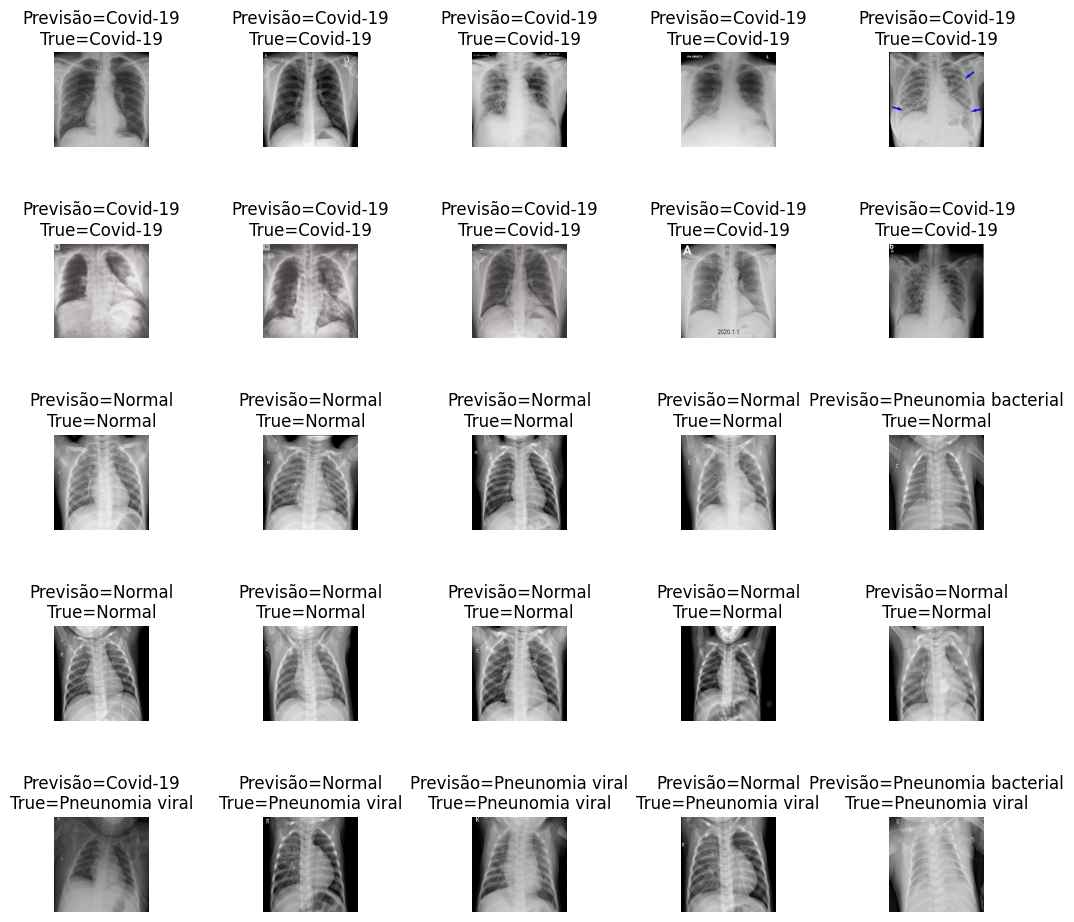

In [126]:
fig, axes = plt.subplots(5, 5, figsize=(12,12))
axes = axes.ravel()
for i in np.arange(0, 25):
  axes[i].imshow(image[i])
  axes[i].set_title('Previsão={}\nTrue={}'.format(str(labels_names[prediction[i]]), str(labels_names[original[i]])))
  axes[i].axis('off')
plt.subplots_adjust(wspace = 1.2)

In [127]:
labels_names

{0: 'Covid-19', 1: 'Normal', 2: 'Pneunomia viral', 3: 'Pneunomia bacterial'}

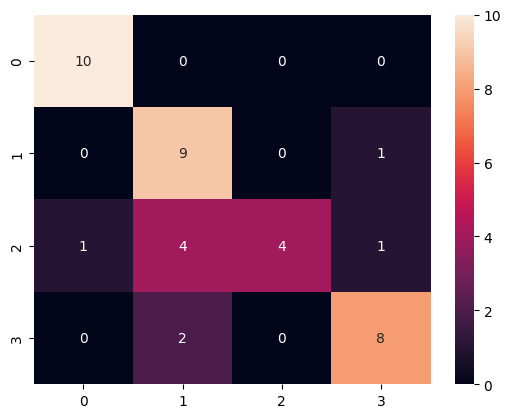

In [129]:
cm = confusion_matrix(original, prediction)
sns.heatmap(cm, annot=True);

In [128]:
"A revocação é uma métrica que indica, das amostras positivas existentes, quantas o modelo conseguiu classificar corretamente."

"A precisão é uma métrica que indica, das classificações positivas do modelo, quantas foram acertadas."

print(classification_report(original, prediction))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.60      0.90      0.72        10
           2       1.00      0.40      0.57        10
           3       0.80      0.80      0.80        10

    accuracy                           0.78        40
   macro avg       0.83      0.77      0.76        40
weighted avg       0.83      0.78      0.76        40



## Classificação de somente uma imagem

In [130]:
from keras.models import load_model
model_loaded = load_model('/content/weights.hdf5')

model_loaded.summary()

Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [131]:
img = cv2.imread('/content/drive/MyDrive/DM/Departamento médico/Test/0/radiol.2020200490.fig3.jpeg')

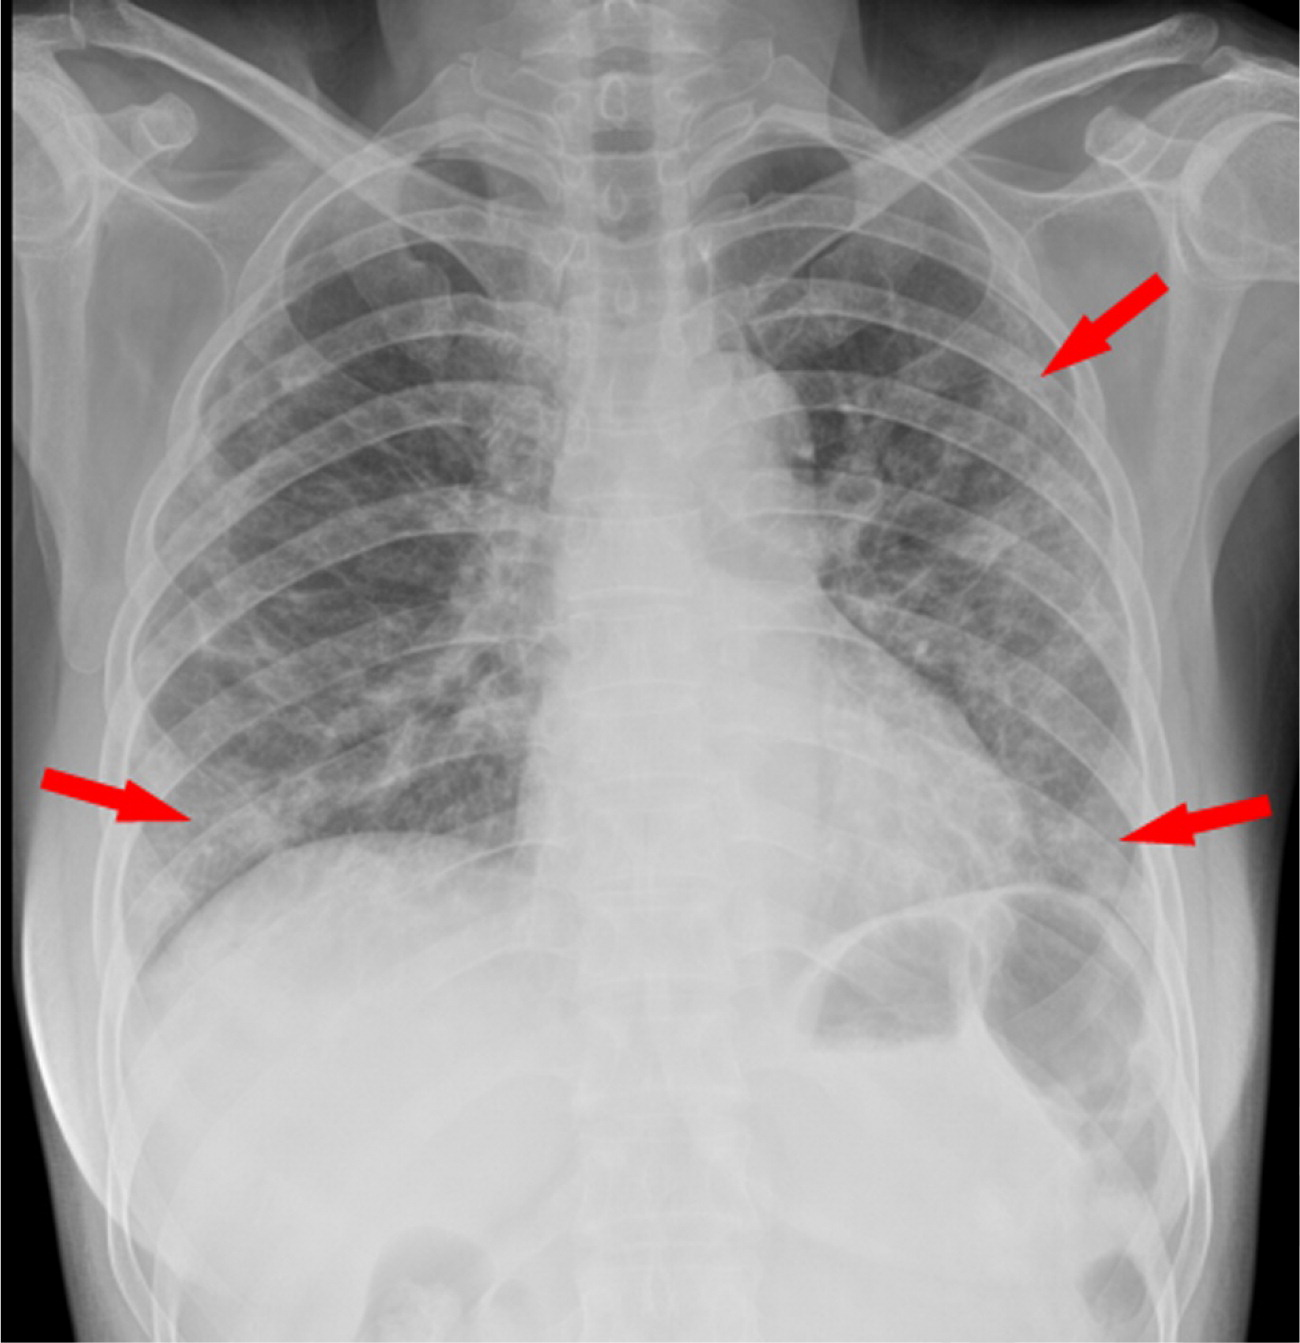

In [132]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

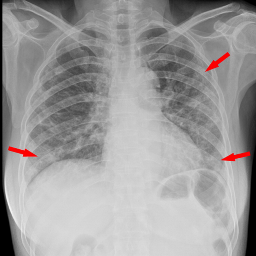

In [133]:
img = cv2.resize(img, (256, 256))
cv2_imshow(img)

In [134]:
img = img / 255

In [135]:
img.shape

(256, 256, 3)

In [136]:
img = img.reshape(-1, 256, 256, 3)
img.shape

(1, 256, 256, 3)

In [138]:
predict = model_loaded(img)
predict

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=array([[1., 0., 0., 0.]], dtype=float32)>

In [139]:
predict2 = np.argmax(predict)
predict2

0

In [141]:
labels_names[predict2]

'Covid-19'